<a href="https://colab.research.google.com/github/m3gan-m/CIDM-6395-Capstone/blob/main/CISBA_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1  align="center">MS CISBA Final Project</h1>

<h2  align="center"> <font color="red">Due date: 12/02/2023 11:59 PM CST </font> </h2>

### Link saved to Google Drive to utilize Google Collab
### Sharable link to be included in Git Hub Repo for Final Project

# 1. Introduction to the project - Problem Statememt

The topic I chose for my Sythnesis Project was researching a small part of Housing Affordability data. As all data sets available within my employer are confidential due to being Private Personal Information (PPI), I was sadly unable to utilize any data extracts or subsets from my company systems. The Housing Affordability Data System (HADS) contains data only up through 2013 which honestly is very close to when our family became homewoners in 2016. While I understand the housing landscape and rent to own percentages are probably drastically differently now in 2023 compared to a mere 10 years ago thanks to Covid-19 and remote work options, I was curious and wanted to see what the data showed for this time period.

- American Housing Survey: Housing Affordability Data System, HUD USER, www.huduser.gov/portal/datasets/hads/hads.html.
- Vandenbroucke, David A. Housing Affordability Data System Documentation File, HUD, 28 Jan. 2011, www.huduser.gov/portal/datasets/hads/HADS_doc.pdf.


# 2. What is this project trying to achieve or bring insight to?

The specific questions I wanted to research and review insights on are as follows:
- Research Question 1: The relationship between an individual’s age and whether they rent or own in 2013.
- Research Question 2: The relationship between income and if it leads to owning or renting for 2013.
- Research Question 3: The frequency of owning compared to the age of a house as of 2013.

Future work could always review data once available for 2023 from AHS and see how the landscape has changed in one decade.

## <font color="blue"> SQL Database: MySQL</font>
This database contains fundamental data from the HUD website.

- **Customers Table**
  - customerID: INT
  - cutomerName: TEXT
  - customerAddress: TEXT
  - customerEmail: TEXT

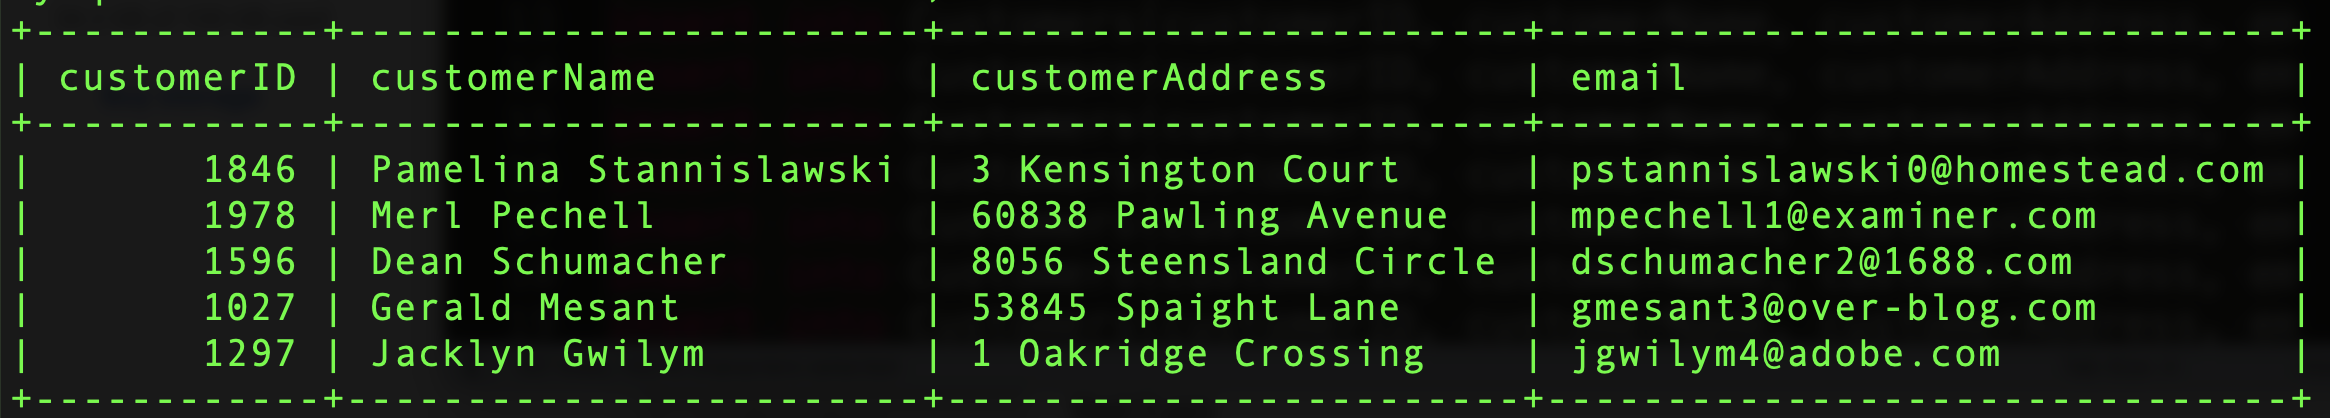

## <font color="red"> File: CSV</font>
This flat file contains housing variables collected by the U.S. Department of Housing and Urban Development (HUD).  Some of these varilables include:
```
    AHS_Control_Number, Age, Area_Med_Income, FMR,
    Poverty_Income, BEDRMS, BUILT, Market_value,
    HH_QTY, HH_Income, Monthly_Hsg, Monthly_Utility,
    Total_Wage, FMTStructureTYpe, FMTOwnRent,
    FMTAssisted
```

The HUD provides interested researchers with access to the original data sets generated by PD&R-sponsored data collection efforts, including the American Housing Survey, median family incomes and income limits, as well as microdata from research initiatives on topics such as housing discrimination, the HUD-insured multifamily housing stock, and the public housing population. This work is very important to understanding the overall health of our nation in housing and urban development. Their main concern is the ups and downs of the ownership or rent of any particular house or an apartment. If more people are renting the apartment means people are moving from different locations to this place or if more people are buying house means they want to settle down with their family. They have a settled fix job. The HADS data is more like an observational data collection. There is no such thing as government is trying to experiment on something.

The HADS system categorizes housing units by affordability and households by income, with respect to the Adjusted Median Income, Fair Market Rent (FMR), and poverty income. It also includes housing cost burden for owner and renter households. These files have been the basis for the worst case needs tables since 2001. The data files are available for public use, since they were derived from AHS public use files and the published income limits and FMRs. The main data sources are the American Housing Survey (AHS) national sample microdata, for the odd numbered years in 1985-2009 and the AHS metropolitan sample microdata for 2002-2009. Poverty income is based on the Census Bureau’s official thresholds with Area median income (AMI) and Fair Market Rent (FMR) data originating from HUD calculations. The HADS datasets contain no proprietary or confidential data.   The purpose of these datasets is to provide housing analysts with consistent measures of affordability and burdens over a long period. By using these available files, this gives the community of housing analysts the opportunity to use a consistent set of affordability measures.


# 2. Data ETL Process

This section demonstrates reading data from various data sources into pandas Dataframes. Then, following the task requirements to process data and get final results.



## 2.1 Extract data from CSV AND SQLite database files

**Download CSV AND SQLite database files**

In [ ]:
# Run this code cell to download CSV AND SQLite database files
!wget 'https://github.com/m3gan-m/CIDM-6395-Capstone/blob/b120708c5c86fe6bb23d70bf84067abbf94eec03/thadsyear2013_dataset.csv'
!wget 'https://github.com/m3gan-m/CIDM-6395-Capstone/blob/b120708c5c86fe6bb23d70bf84067abbf94eec03/Housing.db'

--2023-11-30 15:54:36--  https://github.com/m3gan-m/CIDM-6395-Capstone/blob/b120708c5c86fe6bb23d70bf84067abbf94eec03/thadsyear2013_dataset.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4781 (4.7K) [text/plain]
Saving to: ‘thadsyear2013_dataset.csv.1’

thadsyear2013_datas 100%[===================>]   4.67K  --.-KB/s    in 0s      

2023-11-30 15:54:36 (55.4 MB/s) - ‘thadsyear2013_dataset.csv.1’ saved [4781/4781]

--2023-11-30 15:54:36--  https://github.com/m3gan-m/CIDM-6395-Capstone/blob/b120708c5c86fe6bb23d70bf84067abbf94eec03/Housing.db
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4684 (4.6K) [text/plain]
Saving to: ‘Housing.db.1’

Housing.db.1        100%[===================>]   4.57K  --.-KB/s    in 0s      

2023-11-30 15:5

In [ ]:
# import packages to read sqlite database file with pandas
import sqlite3
import pandas as pd
import datetime

- **Read CSV file**

In [ ]:
# read csv file and show first 5 rows
# put your code below
csv_file = 'thadsyear2013_dataset.csv'
csv_df = pd.read_csv(csv_file)
csv_df.head(5)




,"{""payload"":{""allShortcutsEnabled"":false","fileTree:{"""":{""items"":[{""name"":""CISBA_CAPSTONE.ipynb""","path:""CISBA_CAPSTONE.ipynb""","contentType:""file""}","{""name"":""Housing.db""","path:""Housing.db""","contentType:""file""}.1","{""name"":""Project.sql""","path:""Project.sql""","contentType:""file""}.2",...,notAnalyzed:true,symbols:[],"error:{""code"":""invalid_argument""","msg:""content required""",meta:{}}}},copilotInfo:null,copilotAccessAllowed:false,"csrf_tokens:{""/m3gan-m/CIDM-6395-Capstone/branches"":{""post"":""Gryq4wB8Wu6fawsK_RsGwca2kuLC3LkuNs8mqgF4cVNKlYU0_nvNUIEq8J6sThNOG_Ea52_E193I9jnSHxIlRQ""}","/repos/preferences:{""post"":""j-UWuh6TO0wCndsQZexI_nufaFQJkbYVlbu2waABpaOxyl9OWTG6YU-GBAm15Y9VqtDyocKZEYs0fnRdOlCK7Q""}}}","title:""CIDM-6395-Capstone/thadsyear2013_dataset.csv at b120708c5c86fe6bb23d70bf84067abbf94eec03 · m3gan-m/CIDM-6395-Capstone""}"


- **Read JSON file**

In [ ]:
# read json file and show first 5 rows
# put your code below
import json
import pandas as pd
from urllib.request import urlopen

url = ("https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/productRating.json")
def get_jsonparsed_data(url):
  response = urlopen(url)
  data = response.read().decode("utf-8")
  return json.loads(data)

jsondf = pd.read_json(url)
jsondf.head(5)

,productName,rating
0,Wine - Winzer Krems Gruner,3
1,Banana - Leaves,4
2,Fondant - Icing,3
3,"Arctic Char - Fresh, Whole",3
4,"Nut - Almond, Blanched, Ground",1


- **Read tables from ```eCommerce.db``` SQLite database**
  - Products table
  - Customers table
  - Orders table

1. Connect to the database ```eCommerce.db``` with python package sqlite3.

2. There are three tables in the db file. You may use separate dataframes to read data from different tables. E.g: ```df_products``` is content from Products table.
3. Check the datatype of columns in each dataframe, especially the date columns
**Hint: Python+SQLite+Pandas: https://projectcodeed.blogspot.com/2020/10/python-pandas-and-sqlite.html**

In [ ]:
# Read Products table
# put your code below
import numpy as np
import sqlite3
import pandas as pd

# create the connect to eCommerce database file
con1 = sqlite3.connect('eCommerce.db')

# using pandas to query results from database file
#df_products = pd.read_sql("SELECT * FROM Products", con1)
df_products = pd.read_sql_query("SELECT * FROM Products", con1)
#proddf=pd.dataframe(df_products)
#print(proddf)
print(df_products.iloc[:5])

   productID                     productName  productPrice   productOrigin  \
0        296      Wine - Winzer Krems Gruner          7.35      California   
1        209                 Banana - Leaves          2.31         Indiana   
2        251                 Fondant - Icing          7.57          Nevada   
3        290      Arctic Char - Fresh, Whole          6.91      New Jersey   
4        261  Nut - Almond, Blanched, Ground          7.29  North Carolina   

  productSellBy  
0    2023-11-21  
1    2022-04-05  
2    2023-08-25  
3    2022-05-14  
4    2023-08-18  


In [ ]:
# Read Customers table
# put your code below

import sqlite3 as sql
import pandas as pd
# create the connect to database file
con2 = sql.connect("eCommerce.db")
# using pandas to query results from database file
df_customers = pd.read_sql("SELECT * FROM Customers", con2)
print(df_customers.iloc[:5])

   customerID            customerName         customerAddress  \
0        1846  Pamelina Stannislawski      3 Kensington Court   
1        1978            Merl Pechell    60838 Pawling Avenue   
2        1596         Dean Schumacher  8056 Steensland Circle   
3        1027           Gerald Mesant      53845 Spaight Lane   
4        1297          Jacklyn Gwilym     1 Oakridge Crossing   

                           email  
0  pstannislawski0@homestead.com  
1         mpechell1@examiner.com  
2          dschumacher2@1688.com  
3         gmesant3@over-blog.com  
4             jgwilym4@adobe.com  


In [ ]:
# Read Orders table
# put your code below

import sqlite3 as sql
import pandas as pd
# create the connect to eCommerce database file
con3 = sqlite3.connect("eCommerce.db")
# using pandas to query results from database file
df_orders = pd.read_sql("SELECT * FROM Orders", con3)
print(df_orders.iloc[:5])


   customerID  productID  productQuantity   orderDate
0        1846        218                7  2022-01-01
1        1978        290                1  2022-01-02
2        1596        226                9  2022-01-28
3        1027        250                1  2022-01-08
4        1297        239                7  2022-01-21


## 2.2: Business Tasks

<h4  align="center">
<font color="red">
⚠ No sample results are provided for following tasks. </font> </h4>

- Please follow task requirements to process the data based on your own understanding.
- Add comments to explain the logic/steps you used in the solution. You can add comment in the code lines or at the beginning of your solution.
- The comments could help you organize your solution and help instructor to understand your solution.
- If you did not know how to implement a solution in Python code, put your ideas in the comments. You can still get partial points if the ideas are reasonable.





### **Task 1 (2 points): Count the number of products provided by each productOrigin (State). Show productOrigin and Count**

In [ ]:
# put your code below

#print(df_products)
#Group by the productOrigin (State) and count by product ID
dftask1 = df_products.groupby(['productOrigin'])['productID'].count()
headers = ["productOrigin","Count"]
dftask1.columns = headers
print(dftask1)

productOrigin
Alabama                  1
Arizona                  3
California              11
Colorado                 2
Connecticut              1
District of Columbia     3
Florida                  7
Georgia                  6
Idaho                    1
Illinois                 1
Indiana                  4
Iowa                     1
Kentucky                 1
Louisiana                2
Maryland                 1
Massachusetts            2
Michigan                 1
Minnesota                1
Missouri                 2
Nebraska                 1
Nevada                   3
New Hampshire            1
New Jersey               1
New Mexico               1
New York                 6
North Carolina           8
Ohio                     3
Oklahoma                 1
Pennsylvania             4
South Carolina           1
Tennessee                1
Texas                   10
Virginia                 5
Washington               4
Name: productID, dtype: int64


### **Task 2 (2 points): Find the products that are expired after March 31, 2022 (productSellBy < April 1, 2022). Show their productName and productSellBy date**

In [ ]:
# put your code below

#print(df_products)
#df_products.info()
#Change type of Sell by Date column values to datetime64 instead of object
df_task2 =  df_products.astype({'productSellBy': 'datetime64'})
#df_task2.info()
#print(df_task2)
# Query the database for productSellBy < April 1, 2022
df2=(df_task2["productSellBy"] < '2022-04-01')
df_subset = df_task2.loc[df2]
# Filter by productName
print(df_subset[['productName','productSellBy']])


                           productName productSellBy
7           Cake - Mini Potato Pancake    2022-03-18
14  Chocolate - Liqueur Cups With Foil    2022-03-05
15                Pie Filling - Cherry    2022-01-31
18                 Extract - Raspberry    2022-02-18
21            Cheese - Goat With Herbs    2022-01-13
23            Table Cloth 62x120 White    2022-03-03
33          Wine - Sogrape Mateus Rose    2022-03-07
35                      Bay Leaf Fresh    2022-01-05
43                Buffalo - Tenderloin    2022-02-24
48                    Milk - 2% 250 Ml    2022-02-22
54                        Oil - Peanut    2022-03-14
55     Pasta - Bauletti, Chicken White    2022-03-17
56                        Stock - Fish    2022-01-03
63          Rum - Dark, Bacardi, Black    2022-01-29
64                Ecolab Silver Fusion    2022-01-06
65           Appetizer - Crab And Brie    2022-01-26
75               Juice - Apple, 341 Ml    2022-03-06
81           Jolt Cola - Electric Blue    2022

### **Task 3 (5 points): Find the top 10 best selling products in January 2022 (yyyy-mm-dd: 2022-01-01 to 2022-01-31). The results should show following columns:**
- productName
- totalQuantity (the sum of productQuantity for orders of a product)
- productPrice
- totalSales (productPrice * totalQuantity)

In [ ]:
# put your code below

#print(df_task2)
#filter orders table for January 2022 only
dfdate=df_orders[df_orders['orderDate'].str.contains('2022-01-')]
#print(dfdate)
#First get the total QTY from the January filtered date orders table based on product ID
dfTQ=dfdate.groupby(['productID'])['productQuantity'].count()
#Next get each product price based on product ID
dfPrice=df_products[['productName','productPrice','productID']]
#combine both tables on product ID
result1 = pd.merge(dfPrice, dfTQ, on='productID', how='outer')
#calculate total Sales
result1['totalSales'] = result1['productPrice'] *result1['productQuantity']
#rename column
result2=result1.rename(columns={'productQuantity': 'totalQuantity'})
#drop columns not needed to display
result3 = result2.drop('productID', axis=1)
test = result3.sort_values('totalSales', ascending=False)
#print(test)
#print out dataframes to compare and check
#remove NaN rows
result4=test.dropna()
#print top 10 best selling products ordered by highest total sales
result4.head(10)

,productName,productPrice,totalQuantity,totalSales
15,Pie Filling - Cherry,9.63,11.0,105.93
72,Nantuket Peach Orange,8.21,9.0,73.89
87,Wine - Valpolicella Masi,5.76,12.0,69.12
95,Crackers - Soda / Saltins,7.47,9.0,67.23
66,Appetizer - Crab And Brie,4.57,14.0,63.98
68,"Soup - Campbells, Chix Gumbo",8.65,7.0,60.55
19,"Wine - Red, Concha Y Toro",5.44,11.0,59.84
42,Veal - Inside,8.15,7.0,57.05
90,Muffin Mix - Carrot,8.11,7.0,56.77
76,"Juice - Apple, 341 Ml",9.39,6.0,56.34


### **Task 4 (5 points): Find all Wine (productName contains 'Wine') from Products table. Calculate the totalSales for each wine and sort results in descending order based on the totalSales.  The results should show following columns:**
- productName (productName contains Wine)
- productPrice (unit price of the Wine)
- totalQuantity (sum of productQuantity in orders of a Wine product)
- totalSales  (productPrice * totalQuantity)

In [ ]:
# put your code below

#ensure tables formed in previous question still are valid
#print(dfPrice)
#print(dfTQ)
#create specific table filtered on productName for Wine
dfWine=dfPrice[dfPrice['productName'].str.contains("Wine")==True]
#print(dfWine)
#merge Wine and quatity tables by inner join on product ID
merged_df = pd.merge(dfWine, dfTQ, on='productID', how='inner')
#calculate total sales
merged_df['totalSales'] = merged_df['productPrice'] *merged_df['productQuantity']
#rename column
merge3=merged_df.rename(columns={'productQuantity': 'totalQuantity'})
#drop columns not needed to display
merge4 = merge3.drop('productID', axis=1)
#print out dataframes to compare and check
#remove NaN rows
merge5=merge4.dropna()
print(merge5)

                        productName  productPrice  totalQuantity  totalSales
0        Wine - Winzer Krems Gruner          7.35              4       29.40
1             Rice Wine - Aji Mirin          7.53              4       30.12
2         Wine - Red, Concha Y Toro          5.44             11       59.84
3   Wine - Sherry Dry Sack, William          5.01              7       35.07
4        Wine - Sogrape Mateus Rose          4.10              7       28.70
5     Wine - Red, Black Opal Shiraz          7.71              4       30.84
6    Wine - Marlbourough Sauv Blanc          1.97              4        7.88
7      Wine - Barossa Valley Estate          1.65              7       11.55
8    Wine - White, Lindemans Bin 95          9.68              3       29.04
9      Wine - Vouvray Cuvee Domaine          4.58              1        4.58
10         Wine - Valpolicella Masi          5.76             12       69.12


### **Task 5 (5 points): Find the top 10 customers based on their total spendings in January 2022. The results should show following columns:**
- customerName
- email
- totalSpendings

In [ ]:
# put your code below

#print(dfdate)
#use dfdate from previous question as it filters for January 2022 orders already
#print(dfPrice)
#setup product price to each product by aligning on product ID
spenddf = pd.merge(dfdate, dfPrice, on='productID', how='right')
#calculate the amount spent for every line based on price and QTY
spenddf['SalesTotal'] = spenddf['productPrice'] *spenddf['productQuantity']
#print(df_customers)
#merge previous dataframes on customer ID to find spending by customer
nextdf = pd.merge(spenddf, df_customers, on='customerID', how='right')
#print(nextdf)
#drop unnecssary columns
droppd = nextdf.drop(['orderDate','productName','customerAddress'], axis=1)
#print(droppd)
#print(spenddf)
#find sum of total spendings for each customer by grouping by customer ID. includes other customer variables desired for output.
dfsum=droppd.groupby(['customerID','customerName','email'])['SalesTotal'].sum().sort_values(ascending=False)
#print(dfsum)
#Need only top 10 customer list
df_top10 = dfsum.head(10)
print(df_top10)



customerID  customerName     email                       
1297.0      Jacklyn Gwilym   jgwilym4@adobe.com              263.25
1785.0      Ulick Pirdue     upirduee@technorati.com         247.90
1983.0      Joyce Depke      jdepke1q@engadget.com           236.98
1596.0      Dean Schumacher  dschumacher2@1688.com           229.07
1426.0      Noel Witheridge  nwitheridgec@sourceforge.net    227.48
1467.0      Sabrina Benit    sbenit1h@deviantart.com         227.25
1760.0      Sid Rising       srisings@tiny.cc                226.61
1011.0      Benyamin Rodder  brodder1s@parallels.com         221.93
1510.0      Jessee Earey     jeareyu@cnet.com                220.18
1269.0      Kevina Lomasny   klomasny26@cam.ac.uk            207.65
Name: SalesTotal, dtype: float64


### **Task 6 (6 points): Calculate the average rating (including website rating and external rating) for each product. The results should show following columns:**
- productName
- averageRating for each product

And sort results by averageRating in descending order.

In [ ]:
# put your code below

#bring back csv and json dataframes as they will need to combine
#print(csv_df)
#print(jsondf)
jsonavg=jsondf.groupby(['productName'])['rating'].mean()
#print(jsonavg)
json3=jsonavg.reset_index()
#print(json3)
#convert text to rating number in csv to be similar to json rating. Number needed to determine average value.
csvdf6=csv_df.apply(lambda x: x.replace({'Highly Dissatisfied' : 0,'Dissatisfied' : 1, 'Neutral':2, 'Satisfied':3,'Highly Satisfied': 4 }))
csvdf6['externalRating'] = csvdf6['externalRating'].astype(float)
#print(csvdf6)
csvavg=csvdf6.groupby(['productName'])['externalRating'].mean()
#print(csvavg)
csv3=csvavg.reset_index()
#print(csv3)
task6 = pd.merge(csv3, json3, on='productName', how='outer')
#print(task6)
# Sort multiple columns
#now sort results by the average Rating in descending order.
task6final = task6.sort_values(['externalRating', 'rating'],
              ascending = [False, False])
print(task6final)

                                          productName  externalRating  \
28                                Extract - Raspberry        2.484848   
0                           Appetizer - Crab And Brie        2.482759   
37                               Juice - Orange 1.89l        2.466667   
23  Chocolate - Liqueur Cups With FoilPie Filling ...        2.437500   
64                              Rice Wine - Aji Mirin        2.406250   
..                                                ...             ...   
96                               Wood Chips - Regular        1.514286   
76                           Table Cloth 91x91 Colour        1.472222   
78                   Tart Shells - Barquettes, Savory        1.447368   
6                                  Bar Bran Honey Nut        1.333333   
77                         Tarragon - Primerba, Paste        1.166667   

      rating  
28  1.785714  
0   2.285714  
37  2.071429  
23  2.190476  
64  2.095238  
..       ...  
96  2.357143  
76 

### **Task 7 (5 points): Calculate the daily sales for days in January 2022 (2022-01-01 to 2022-01-31). Plot the daily sales in a line chart.**

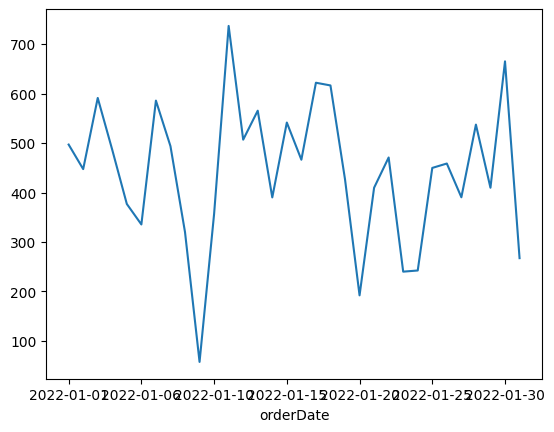

In [ ]:
# put your code below

#use January filtered orders table to start
#print(dfdate)
#use previous product price table to align on product ID and calcuate sales
#print(dfPrice)
byday = dfdate.sort_values('orderDate', ascending=True)
#print(byday)
#combine both tables on product ID
result7 = pd.merge(dfPrice, dfdate, on='productID', how='outer')
#calculate total sales for each row
result7['totalSales'] = result7['productPrice'] *result7['productQuantity']
#order table by date to clearly group
byday = result7.sort_values('orderDate', ascending=True)
#print(byday)
# Use GroupBy() & compute sum on specific column
df7 = byday.groupby('orderDate')['totalSales'].sum()
#print(df7)
#plot sales total by day in line chart
lines = df7.plot.line()